# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | chivay
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | darnah
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | acapulco
Processing Record 11 of Set 1 | husavik
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | lagoa
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | praia
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | hearst
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | radhanpur
Processing Re

Processing Record 38 of Set 4 | kotido
Processing Record 39 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | fort nelson
Processing Record 42 of Set 4 | haines junction
Processing Record 43 of Set 4 | marsa matruh
Processing Record 44 of Set 4 | mathathane
Processing Record 45 of Set 4 | pimentel
Processing Record 46 of Set 4 | temaraia
City not found. Skipping...
Processing Record 47 of Set 4 | cherskiy
Processing Record 48 of Set 4 | yeppoon
Processing Record 49 of Set 4 | salalah
Processing Record 0 of Set 5 | batemans bay
Processing Record 1 of Set 5 | port-gentil
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | clyde river
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | aflu
City not found. Skipping...
Processing Record 6 of Set 5 | warmbad
Processing Record 7 of Set 5 | nuuk
Processing Record 8 of Set 5 | new norfolk
Processing Reco

Processing Record 29 of Set 8 | baruun-urt
Processing Record 30 of Set 8 | uusikaupunki
Processing Record 31 of Set 8 | freeport
Processing Record 32 of Set 8 | thinadhoo
Processing Record 33 of Set 8 | atkarsk
Processing Record 34 of Set 8 | tsienyane
City not found. Skipping...
Processing Record 35 of Set 8 | manaus
Processing Record 36 of Set 8 | mayumba
Processing Record 37 of Set 8 | vestmannaeyjar
Processing Record 38 of Set 8 | abha
Processing Record 39 of Set 8 | mentok
City not found. Skipping...
Processing Record 40 of Set 8 | inongo
Processing Record 41 of Set 8 | javanrud
Processing Record 42 of Set 8 | callaway
Processing Record 43 of Set 8 | kannur
Processing Record 44 of Set 8 | vanimo
Processing Record 45 of Set 8 | zeya
Processing Record 46 of Set 8 | morant bay
Processing Record 47 of Set 8 | taganak
Processing Record 48 of Set 8 | aras
Processing Record 49 of Set 8 | dwarka
Processing Record 0 of Set 9 | skjervoy
Processing Record 1 of Set 9 | maracacume
Processing R

Processing Record 18 of Set 12 | russell
Processing Record 19 of Set 12 | touros
Processing Record 20 of Set 12 | anahuac
Processing Record 21 of Set 12 | corumba
Processing Record 22 of Set 12 | teknaf
Processing Record 23 of Set 12 | bani walid
Processing Record 24 of Set 12 | redlands
Processing Record 25 of Set 12 | mezhgorye
Processing Record 26 of Set 12 | marzuq
Processing Record 27 of Set 12 | hervey bay
Processing Record 28 of Set 12 | talcahuano
Processing Record 29 of Set 12 | camocim
Processing Record 30 of Set 12 | bambanglipuro
Processing Record 31 of Set 12 | hambantota
Processing Record 32 of Set 12 | kohlu
Processing Record 33 of Set 12 | korla
Processing Record 34 of Set 12 | makakilo city
Processing Record 35 of Set 12 | cupira
Processing Record 36 of Set 12 | meadow lake
Processing Record 37 of Set 12 | pitimbu
Processing Record 38 of Set 12 | kloulklubed
Processing Record 39 of Set 12 | kilmez
City not found. Skipping...
Processing Record 40 of Set 12 | vangaindran

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.19,97,100,1.34,EC,1678270213
1,port elizabeth,-33.9180,25.5701,24.62,68,1,4.02,ZA,1678270271
2,talnakh,69.4865,88.3972,-27.72,96,94,3.49,RU,1678270271
3,chivay,-15.6383,-71.6011,8.96,87,100,0.42,PE,1678270271
4,vaini,-21.2000,-175.2000,25.70,68,89,9.78,TO,1678270272


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.19,97,100,1.34,EC,1678270213
1,port elizabeth,-33.9180,25.5701,24.62,68,1,4.02,ZA,1678270271
2,talnakh,69.4865,88.3972,-27.72,96,94,3.49,RU,1678270271
3,chivay,-15.6383,-71.6011,8.96,87,100,0.42,PE,1678270271
4,vaini,-21.2000,-175.2000,25.70,68,89,9.78,TO,1678270272


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

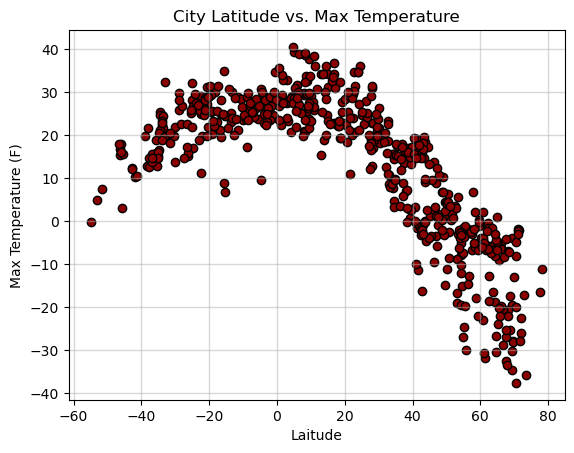

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "darkred", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig1-City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

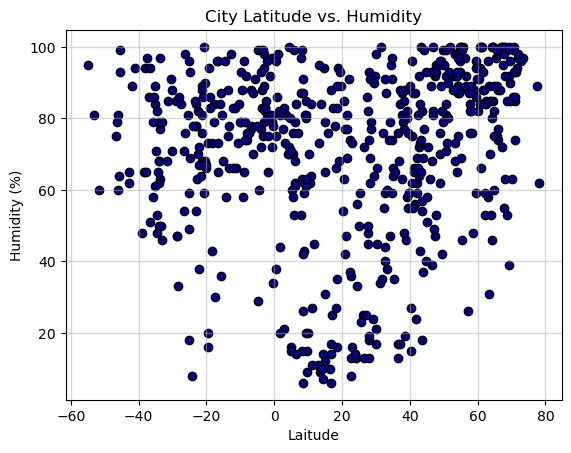

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "darkblue", edgecolor = "black")


# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig2-City Latitude vs. Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

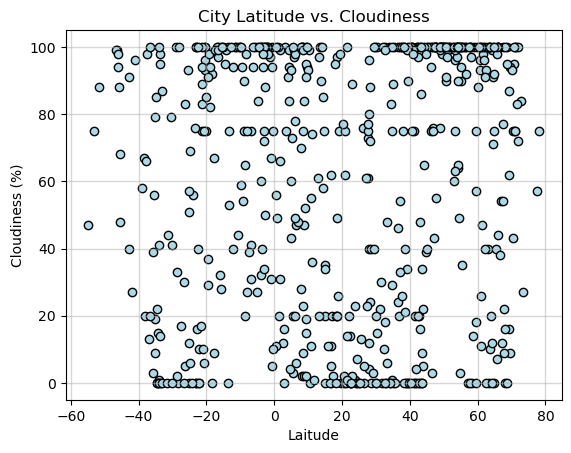

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "lightblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig3-City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

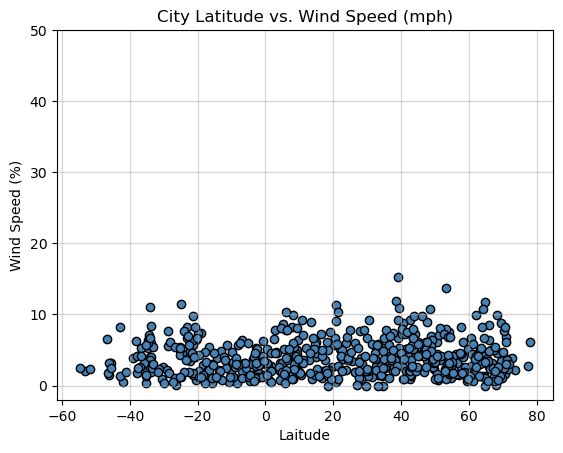

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig4-City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
northern_hemi = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi = city_data_df.loc[city_data_df["Lat"] < 0]

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,talnakh,69.4865,88.3972,-27.72,96,94,3.49,RU,1678270271
5,darnah,32.7670,22.6367,18.63,59,18,5.27,LY,1678270272
8,acapulco,16.8634,-99.8901,22.90,88,0,1.03,MX,1678270273
9,husavik,66.0449,-17.3389,-5.06,74,100,8.46,IS,1678270273
10,saskylakh,71.9167,114.0833,-26.01,97,72,3.69,RU,1678270273


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.19,97,100,1.34,EC,1678270213
1,port elizabeth,-33.9180,25.5701,24.62,68,1,4.02,ZA,1678270271
3,chivay,-15.6383,-71.6011,8.96,87,100,0.42,PE,1678270271
4,vaini,-21.2000,-175.2000,25.70,68,89,9.78,TO,1678270272
6,hobart,-42.8794,147.3294,12.37,65,40,8.23,AU,1678270072


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7889463264866267


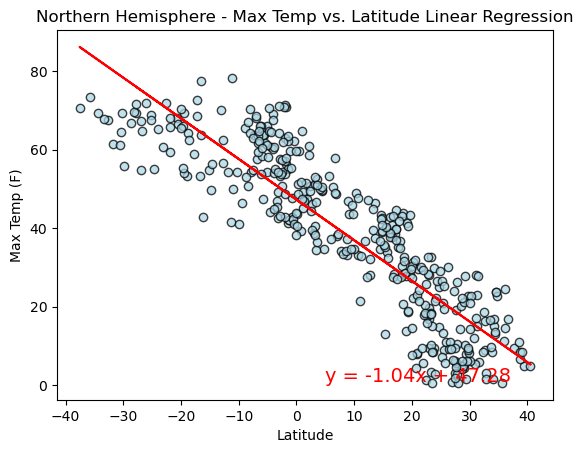

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi["Max Temp"]
y_values = northern_hemi["Lat"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter #plot line
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.0, 0.8), fontsize=14,color="red")

#Labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-value is: {rvalue**2}")
plt.show()

There is a strong negative correlation between latitude and max temperature in the Northern Hemisphere.

The r-value is: 0.3746628011732245


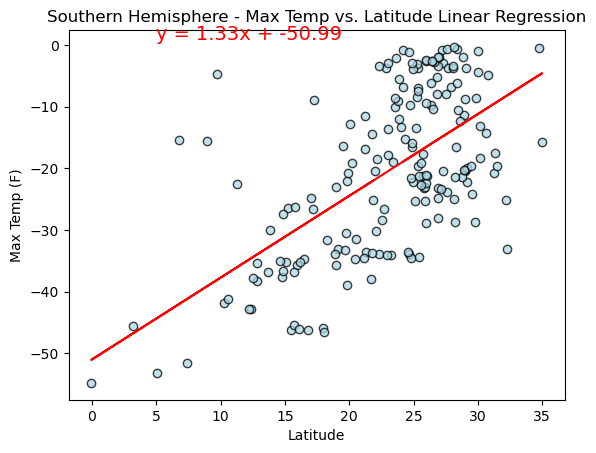

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi["Max Temp"]
y_values = southern_hemi["Lat"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter #plot line
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.0, 0.8), fontsize=14,color="red")


#Labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-value is: {rvalue**2}")
plt.show()

There is a strong positive correlation between latitude and max temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1716861066653165


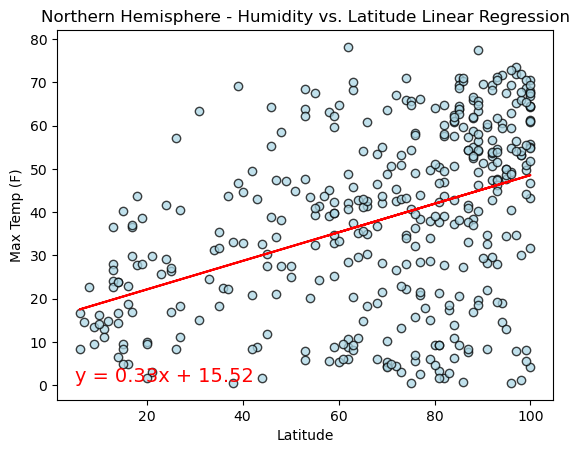

In [37]:
# Northern Hemisphere
x_values = northern_hemi["Humidity"]
y_values = northern_hemi["Lat"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter #plot line
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.0, 0.8), fontsize=14,color="red")


#Labels
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.02082448285031518


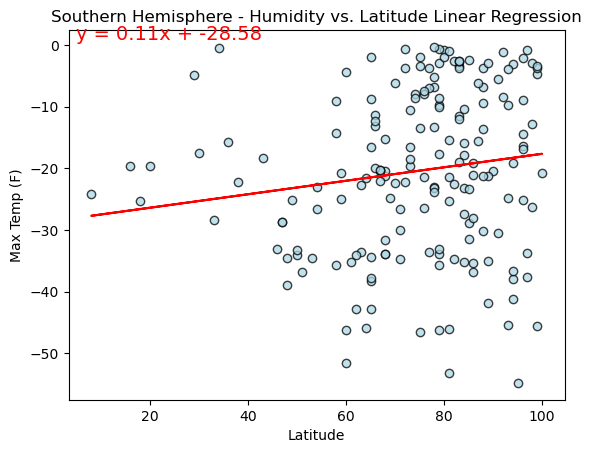

In [38]:
# Southern Hemisphere
x_values = southern_hemi["Humidity"]
y_values = southern_hemi["Lat"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter #plot line
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.0, 0.8), fontsize=14,color="red")


#Labels
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-value is: {rvalue**2}")
plt.show()

Despite the correlation being positive for both Northern and Southern Hemisphere between latitude and humidity the points on the scatter plot suggest that the humidity is quite random. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04971308469729297


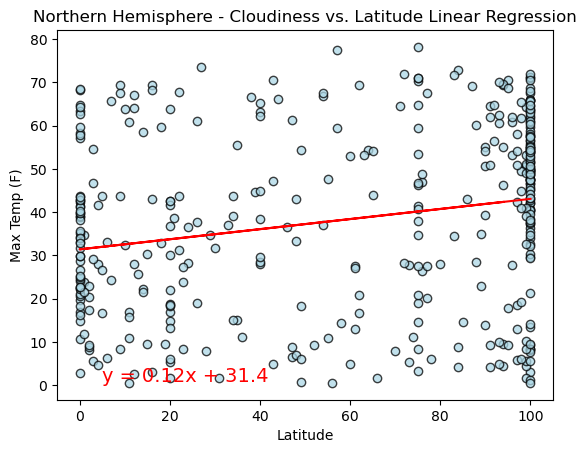

In [39]:
# Northern Hemisphere
x_values = northern_hemi["Cloudiness"]
y_values = northern_hemi["Lat"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter #plot line
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.0, 0.8), fontsize=14,color="red")


#Labels
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.06195143031408369


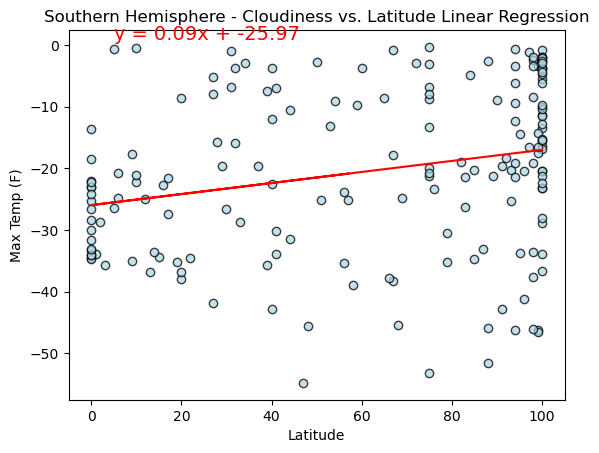

In [40]:
# Southern Hemisphere
x_values = southern_hemi["Cloudiness"]
y_values = southern_hemi["Lat"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter #plot line
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.0, 0.8), fontsize=14,color="red")


#Labels
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-value is: {rvalue**2}")
plt.show()

Despite the correlation being positive for both Northern and Southern Hemisphere between latitude and cloudiness the points on the scatter plot suggest that cloud cover is very random. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0002362992959937536


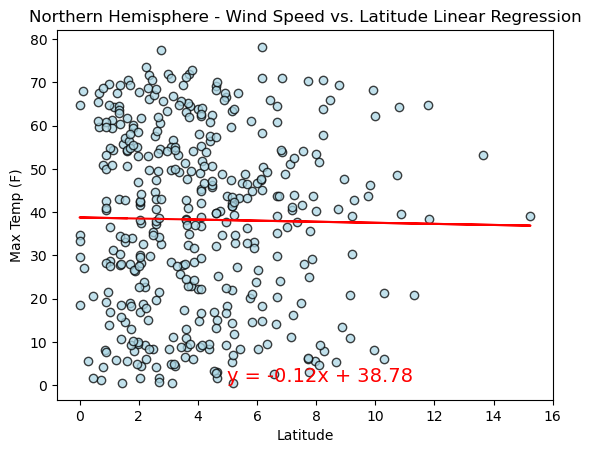

In [41]:
# Northern Hemisphere
x_values = northern_hemi["Wind Speed"]
y_values = northern_hemi["Lat"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter #plot line
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.0, 0.8), fontsize=14,color="red")


#Labels
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.02909239224042503


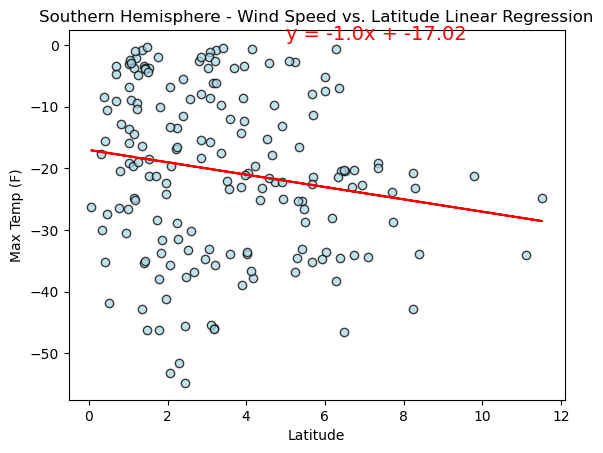

In [42]:
# Southern Hemisphere
x_values = southern_hemi["Wind Speed"]
y_values = southern_hemi["Lat"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter #plot line
plt.scatter(x_values, y_values, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.0, 0.8), fontsize=14,color="red")


#Labels
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"The r-value is: {rvalue**2}")
plt.show()

Despite the correlation being negative for both Northern and Southern Hemisphere between latitude and wind speed the points on the scatter plot suggest that wind speed is very random. 